# Uber Data Analysis

This analysis explores ride patterns by date, time, day, and month, identifying peak travel periods. It includes correlation analysis, categorical encoding, and visualization to uncover trends. Insights from heatmaps, bar plots, and line charts help understand user behavior and travel frequency.

The data analysis is strucutred as:
1. [Installing Required Packages](#Installing-Required-Packages)
2. [Data Analysis and Manipulation](#Data-Analysis-and-Manipulation)
3. [Data Visualization](#Data-Visualization)

## Installing Required Packages

In [53]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [48]:
# Loading the dataset
dataset = pd.read_csv("UberDataset.csv")

In [49]:
# To retrieve the top 5 rows
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [50]:
# To find the total number of rows and columns
dataset.shape

(1156, 7)

In [51]:
# To find the complete infromation of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Analysis and Manipulation

In [52]:
# To replace all occurences of NOT in the PURPOSE column
dataset.replace({'PURPOSE': 'NOT'}, inplace=True)

In [54]:
# To Convert START_DATE and END_DATE columns to datetime format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [56]:
# To Extract the date and hour components from the START_DATE column
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] =  pd.DatetimeIndex(dataset['START_DATE']).hour
# Changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'], 
                              bins = [0,10,15,19,24],
                              labels = 
['Morning','Afternoon','Evening','Night'])

In [57]:
# To drop all rows with missing values
dataset.dropna(inplace=True)

In [58]:
# Identifies all columns in the dataset with data type 'object'
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
# Creates a dictionary to store the count of unique values in each categorical column
unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
# Displays the dictionary containing the number of unique values for each categorical column
unique_values

{'CATEGORY': 1, 'START': 69, 'STOP': 74, 'PURPOSE': 6, 'date': 85}

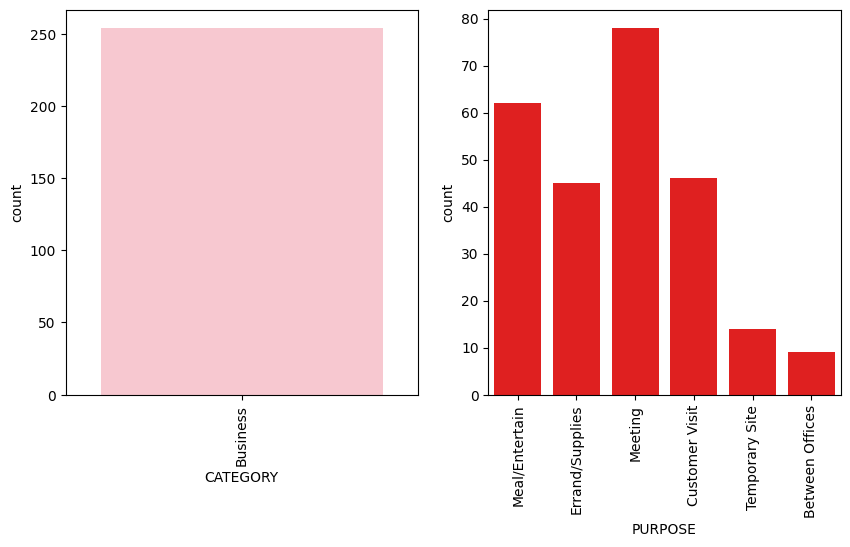

In [59]:
# Sets the figure size for better visualization
plt.figure(figsize=(10,5))
# To create the first subplot for 'CATEGORY' column distribution
plt.subplot(1,2,1)
sns.countplot(x ='CATEGORY',color = 'pink', data = dataset)
plt.xticks(rotation=90)
# To create the second subplot for 'PURPOSE' column distribution
plt.subplot(1,2,2)
sns.countplot(x = 'PURPOSE',color = 'red', data = dataset)
plt.xticks(rotation=90)
plt.show()

C:\Users\Varsha Singh\AppData\Local\Temp\ipykernel_17200\3246208257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'day-night',palette = ('red','blue','green','yellow'), data = dataset)


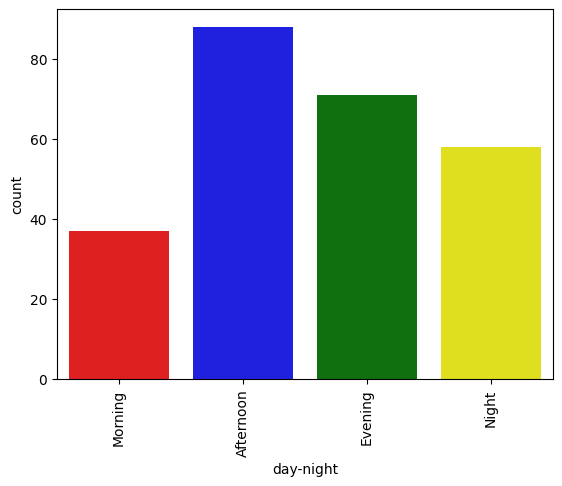

In [60]:
# To plot the count of each category in the 'day-night' column using different colors
sns.countplot(x = 'day-night',palette = ('red','blue','green','yellow'), data = dataset)
# To rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()

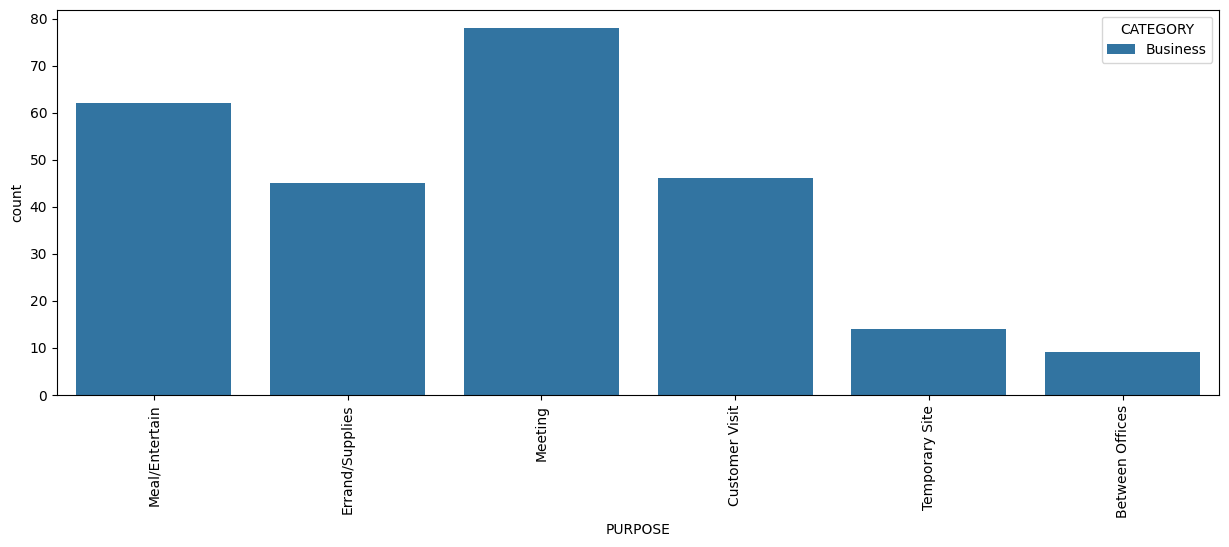

In [61]:
# To set the figure size for better visualization
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x= 'PURPOSE', hue= 'CATEGORY')
# To rotate x-axis labels for better readability.
plt.xticks(rotation=90)
plt.show()

<Axes: >

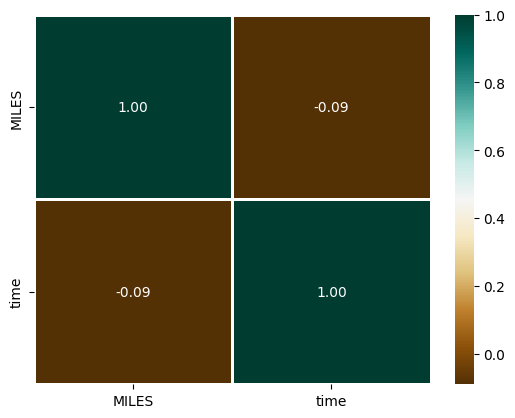

In [ ]:
# To select only numeric columns from the dataset for correlation analysis
numeric_dataset = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

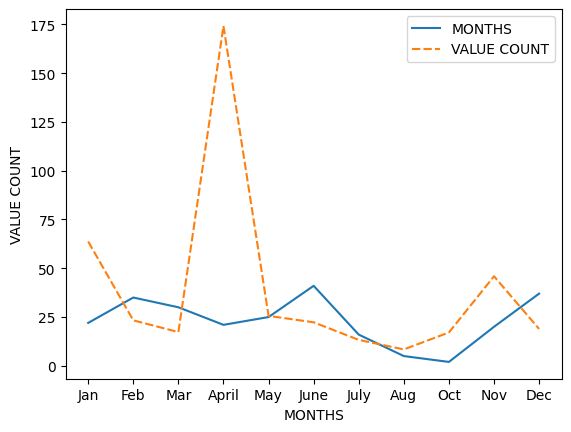

In [65]:
# To extract the month from the 'START_DATE' column
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
# To create a dictionary to map numerical months to their corresponding month names
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)
# To count the number of occurrences for each month
mon = dataset.MONTH.value_counts(sort=False)
#Month total rides count vc Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)
['MILES'].max()})
# To plot a line graph showing the monthly trend
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Text(0, 0.5, 'COUNT')

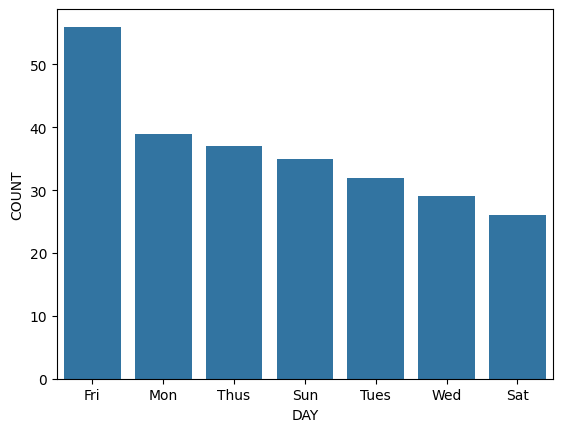

In [66]:
# To extract the weekday (0-6) from the 'START_DATE' column
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6:'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)
# To count the occurrences of each weekday in the dataset
day_label = dataset.DAY.value_counts()
# To create a bar plot to visualize
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: ylabel='MILES'>

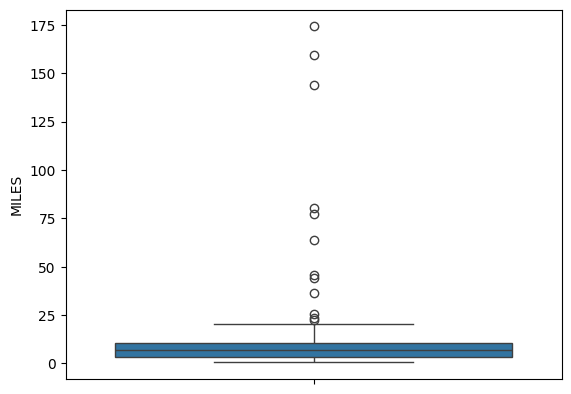

In [67]:
# To create a boxplot
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

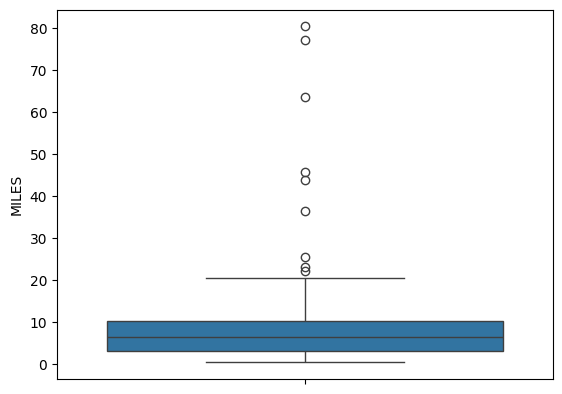

In [68]:
# To create a boxplot
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])